<a href="https://colab.research.google.com/github/LalithaJanneti/House-price-prediction/blob/main/Ridge_and_Lasso_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df['target']=dataset.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()
model.fit(X_train,y_train)
mse=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print('Mean Squared Error:',mean_mse)

Mean Squared Error: -2993.0813104693307


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
ridge_regressor=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))

{'alpha': 0.001}
-2993.066154653869
Ridge Regression:
MSE: 3077.41593882723
R2 Score: 0.41915292635986545


Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
lasso_regressor=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 1e-08}
-2993.081309274593


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R2 Score:", r2_score(y_test, lasso_pred))



Lasso Regression:
MSE: 2798.193485169719
R2 Score: 0.4718547867276227


Graphical representation

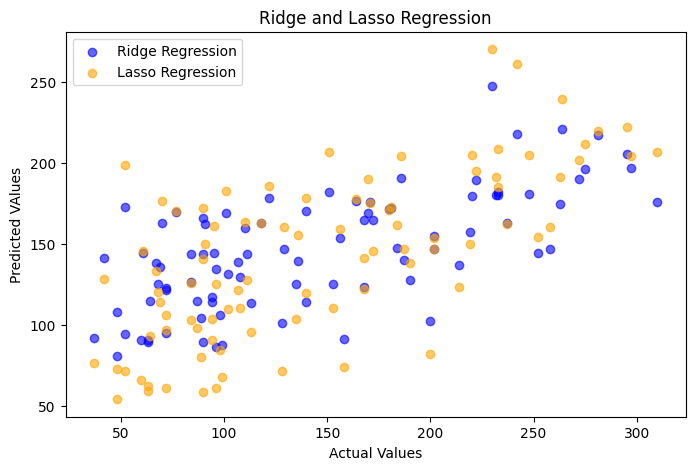

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,ridge_pred,color='blue',alpha=0.6,label='Ridge Regression')
plt.scatter(y_test,lasso_pred,color='orange',alpha=0.6,label='Lasso Regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted VAlues")
plt.title("Ridge and Lasso Regression")
plt.legend()
plt.show()

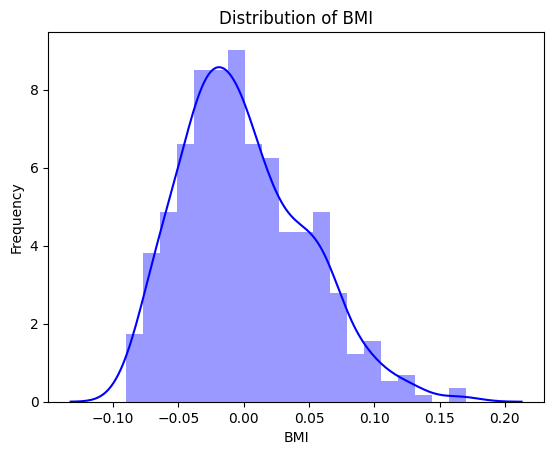

In [ ]:
sns.distplot(df['bmi'], bins=20, color='blue', hist=True, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
predictor_lasso=lasso_regressor.predict(X_test)
predictor_ridge=ridge_regressor.predict(X_test)

<Axes: xlabel='target', ylabel='Density'>

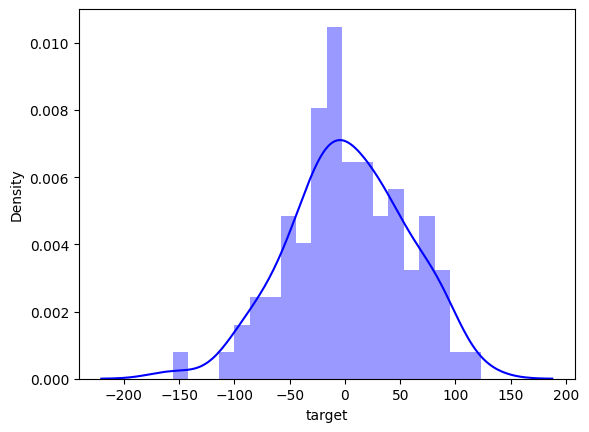

In [ ]:
sns.distplot(y_test-predictor_lasso,bins=20,color='blue',hist=True,kde=True,label='Lasso Regression')

<Axes: xlabel='target', ylabel='Density'>

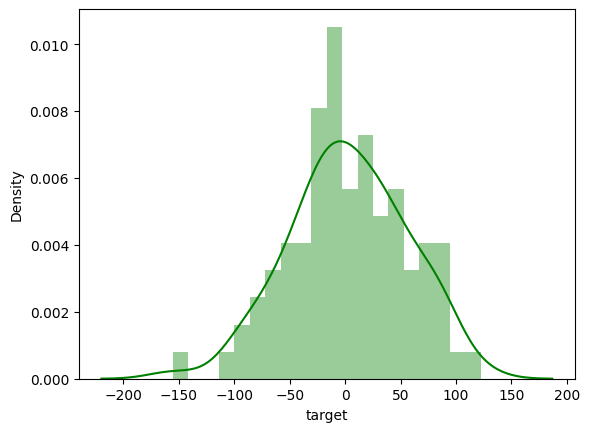

In [ ]:
sns.distplot(y_test-predictor_ridge,bins=20,color='green',hist=True,kde=True,label='Ridge Regression')
